## Companion notebook for "Enhancing reproducibility in bioimage analysis: focus on controls and effect sizes, not just p-values"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Enhancing reproducibility in bioimage analysis: focus on controls
and effect sizes, not just p-values".

If you are interested in taking a look at the original images of Fascin knockdown (KD) HeLa cells under different experimental conditions from [Lawson et al., 2022](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9427113/), these are freely available on the [Image Data Resource](https://idr.openmicroscopy.org) under accession number IDR0139. We selected specific wells (Fig. 2-3: J05, O02, E22, L08; Fig. 4: J05, I19, G15, O02, B02, N12, L08, L18, H13, E22, H10, B06) from plate number 1093711385 for use in this work.

We took into consideration three channels for each image: cell nuclei (Hoescht), Fascin and actin. Moreover, we compared data from specific pharmacological compounds (Fig. 1-3: SN0212398523; Fig. 4: SN0212398523, SN1066932540, SN1054616339), with three controls: untreated (negative control), DMSO (vehicle control), and Leptomycin b (positive control). Image analysis was performed in CellProfiler, with a pipeline available in associated [GitHub repo](https://github.com/djpbarry/dont-trust-p-values).

#### Import utility functions

In [1]:
import sys
 
# setting path
sys.path.append('../')
 
# importing
from utility_functions import *

#### Set up parameters for plots

In [2]:
plt.rcParams['font.size'] = 26
plt.rcParams['axes.linewidth'] = 2
color_dict = {'SN1066932540': 'red', 
              'SN1054616339': 'yellow', 
              'SN0212398523': 'orange', 
              'Untreated': 'blue', 
              'DMSO': 'gray', 
              'Leptomycin b': 'purple'}
y_label = 'Relative Nuclear Fascin Localisation'

#### Set up variables

In [3]:
plate_number = 1093711385
treatment_col = 'Treatment'
variable_of_interest = 'Fascin_Ratio'
dunn_pairs = [('Untreated', 'DMSO'), ('DMSO', 'SN0212398523'), ('SN0212398523', 'Leptomycin b'),
              ('Untreated', 'SN0212398523'), ('Untreated', 'Leptomycin b'), ('DMSO', 'Leptomycin b')]

#### Set up input and output folders

In [4]:
directories = ('./inputs/idr', './outputs/plots', './outputs/data')

for d in directories:
    if not os.path.exists(d):
        os.makedirs(d)

output_dir = './outputs/plots'

#### Download plate annotations in the input folder

In [5]:
idr_annotations_file_path = './inputs/idr/idr0139-screenA-annotation.csv'
idr_annotations_url = 'https://raw.githubusercontent.com/IDR/idr0139-lawson-fascin/main/screenA/idr0139-screenA-annotation.csv'

download_csv(idr_annotations_file_path, idr_annotations_url)

File already exists.


#### Load CellProfile analysis output

In [6]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_number)
compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Proprietary Compound'].to_dict()
treatments_to_compounds = {'Treated': 'Treated', 'Negative Control': 'Untreated', 
                           'Neutral Control': 'DMSO', 'Stimulator Control': 'Leptomycin b'}
image_data = pd.read_csv('./inputs/cell_profiler_outputs/Image.csv')
nuc_data = pd.read_csv('./inputs/cell_profiler_outputs/Nuclei.csv')
cyto_data = pd.read_csv('./inputs/cell_profiler_outputs/Cytoplasm.csv')
treatments = annotations.set_index('Well')['Control Type'].to_dict()

#### Select data subsets

In [7]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds, compounds,
                           ['J05', 'O02', 'E22', 'L08'])

In [8]:
data_subset1 = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds, compounds,
                           ['J05', 'I19', 'G15', 'O02', 'B02', 'N12', 'L08', 'L18', 'H13', 'E22', 'H10', 'B06'])

#### Plot figures
##### Figure 2A-F

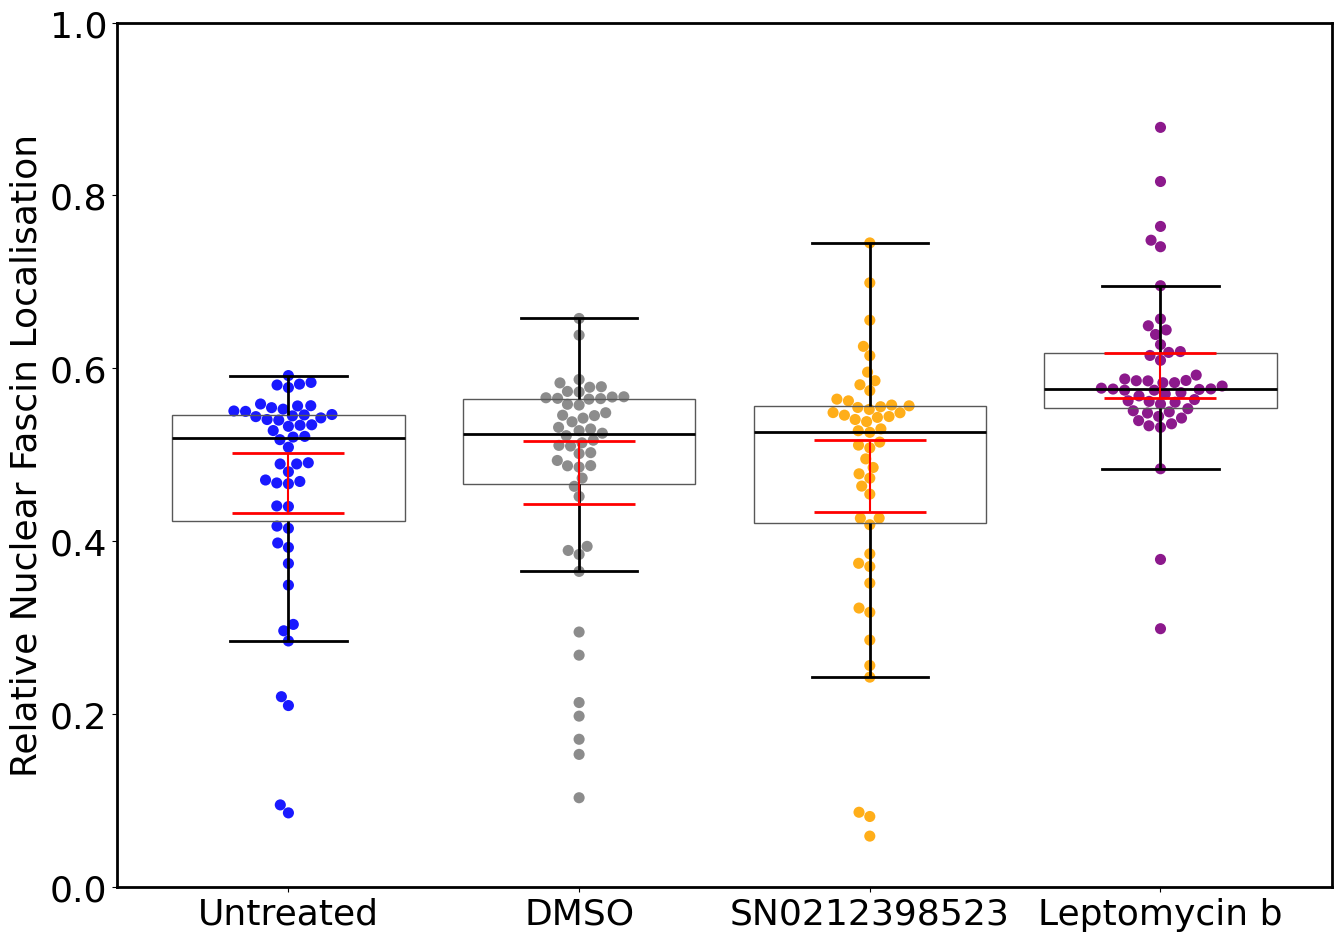

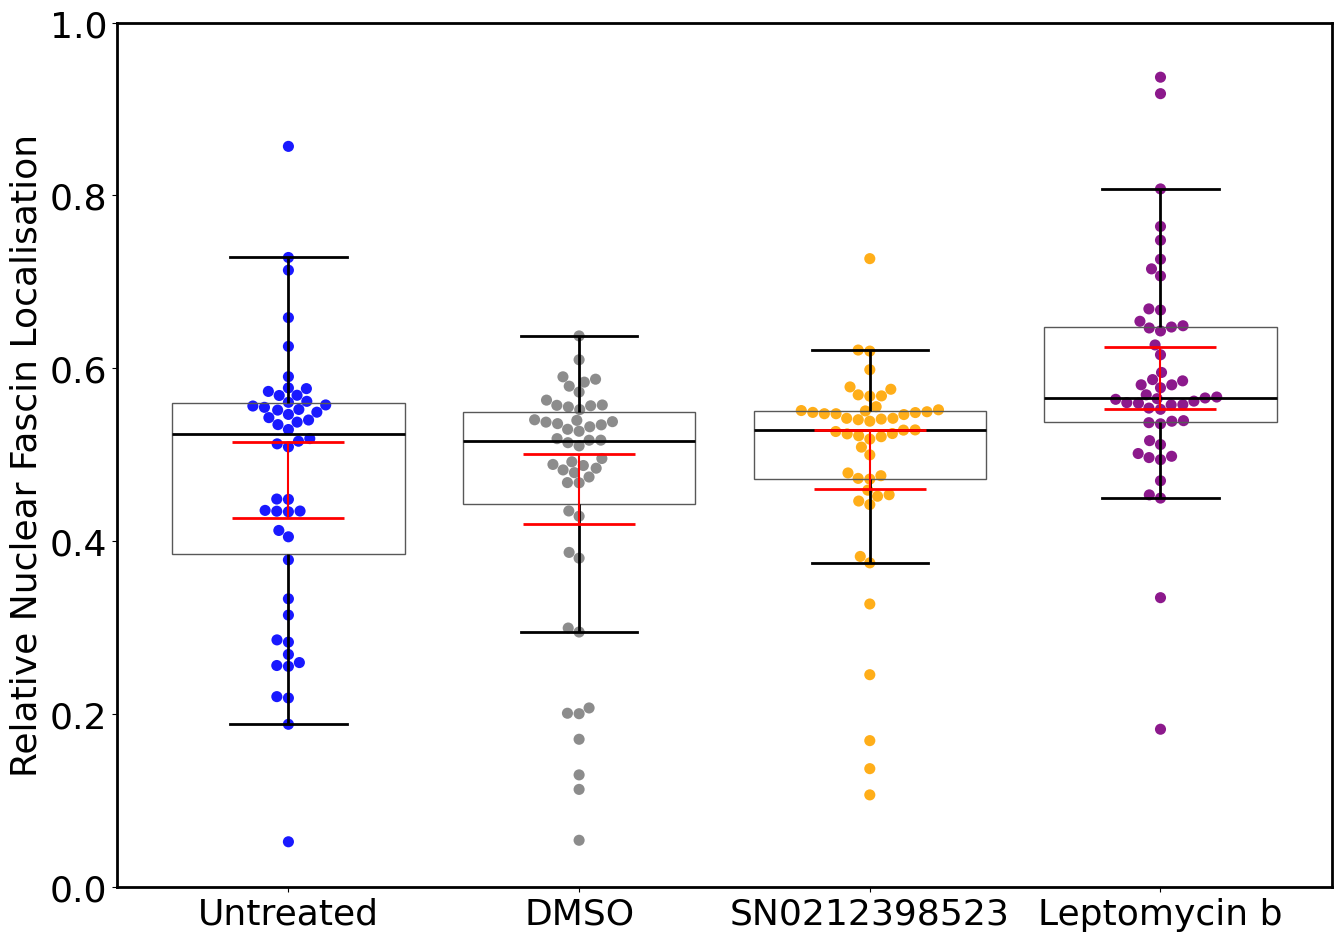

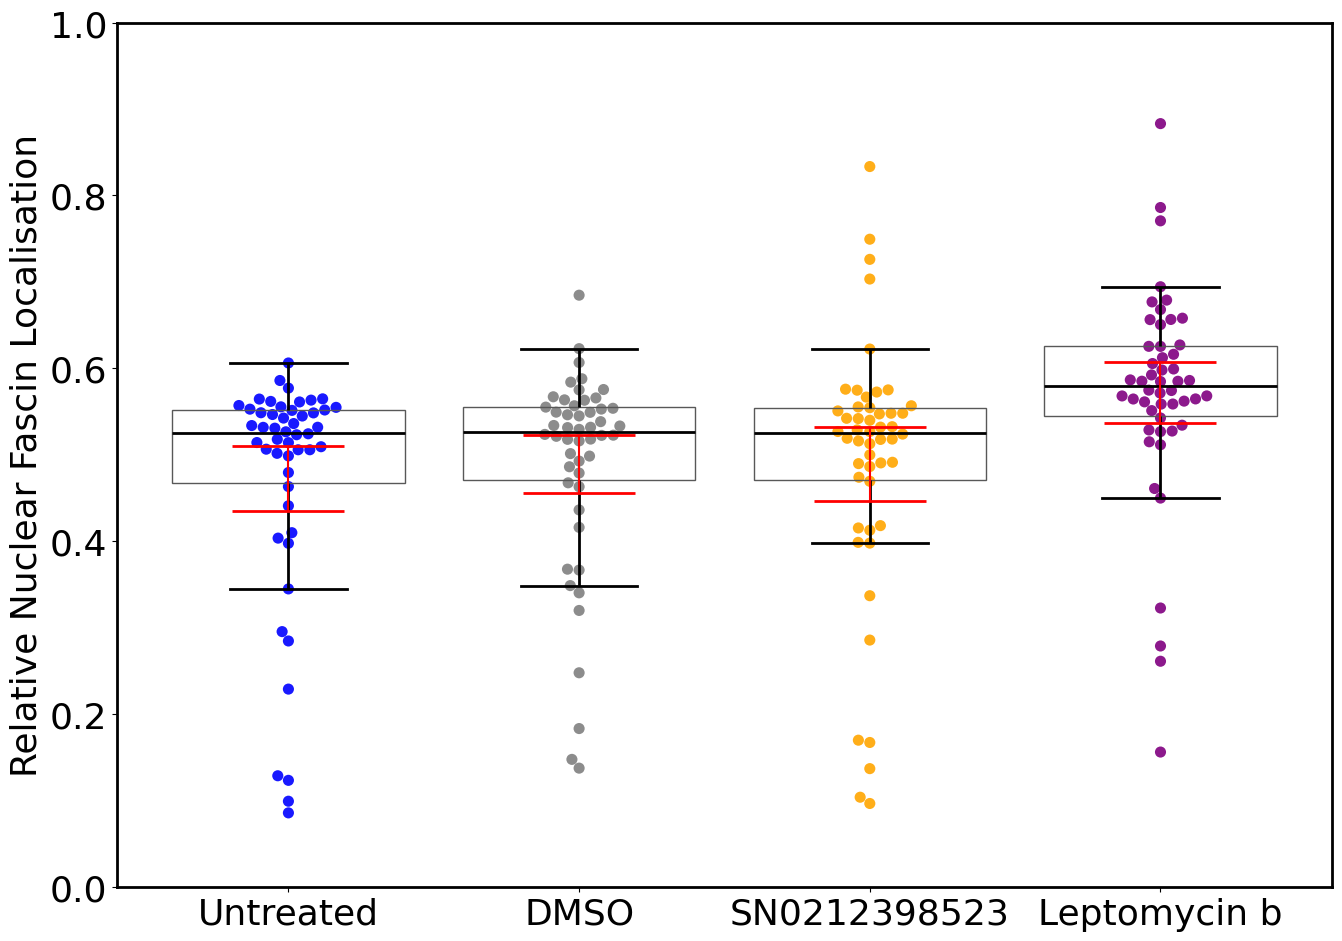

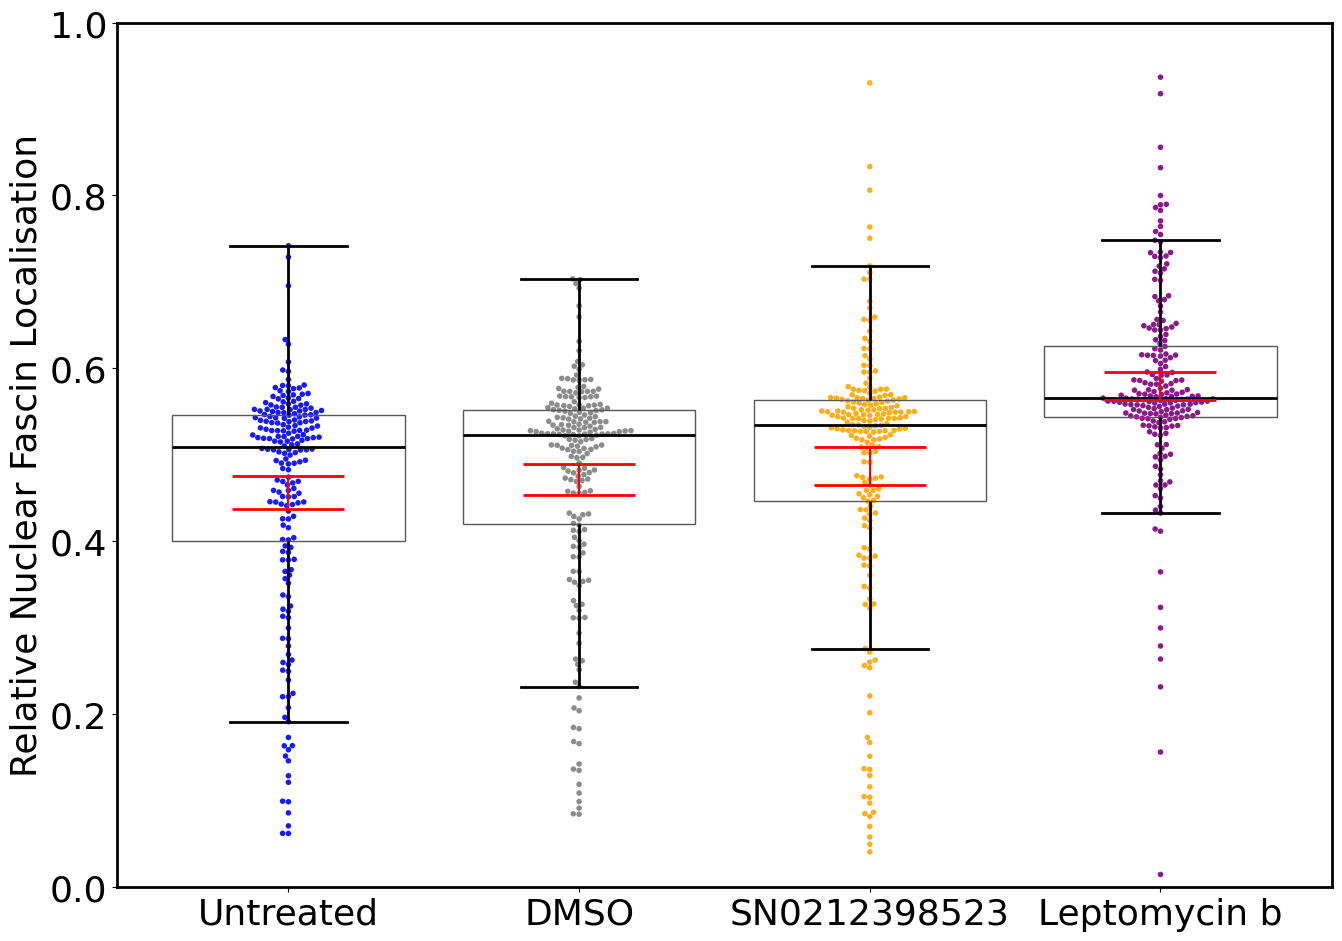

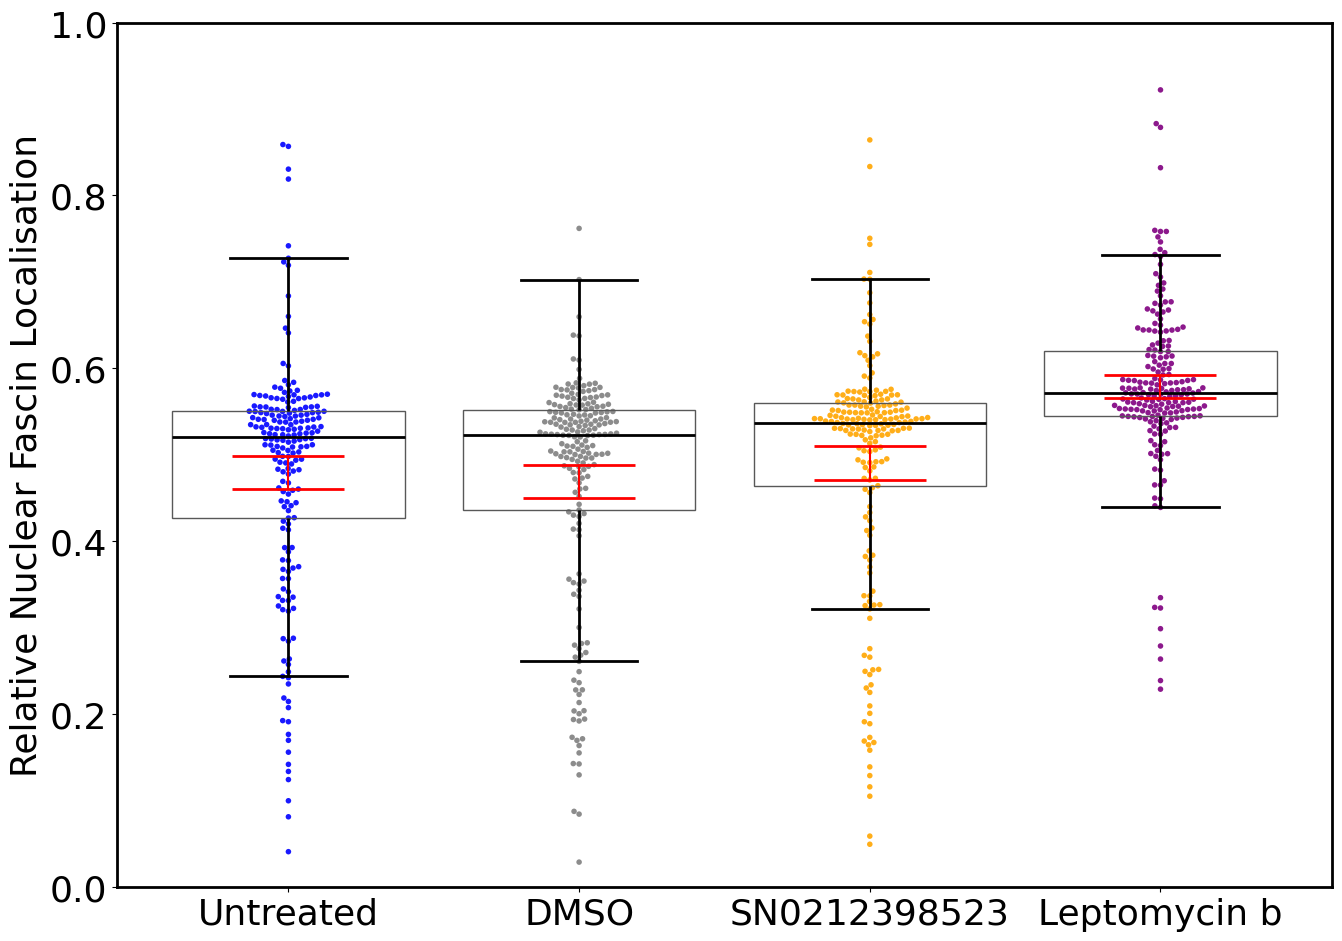

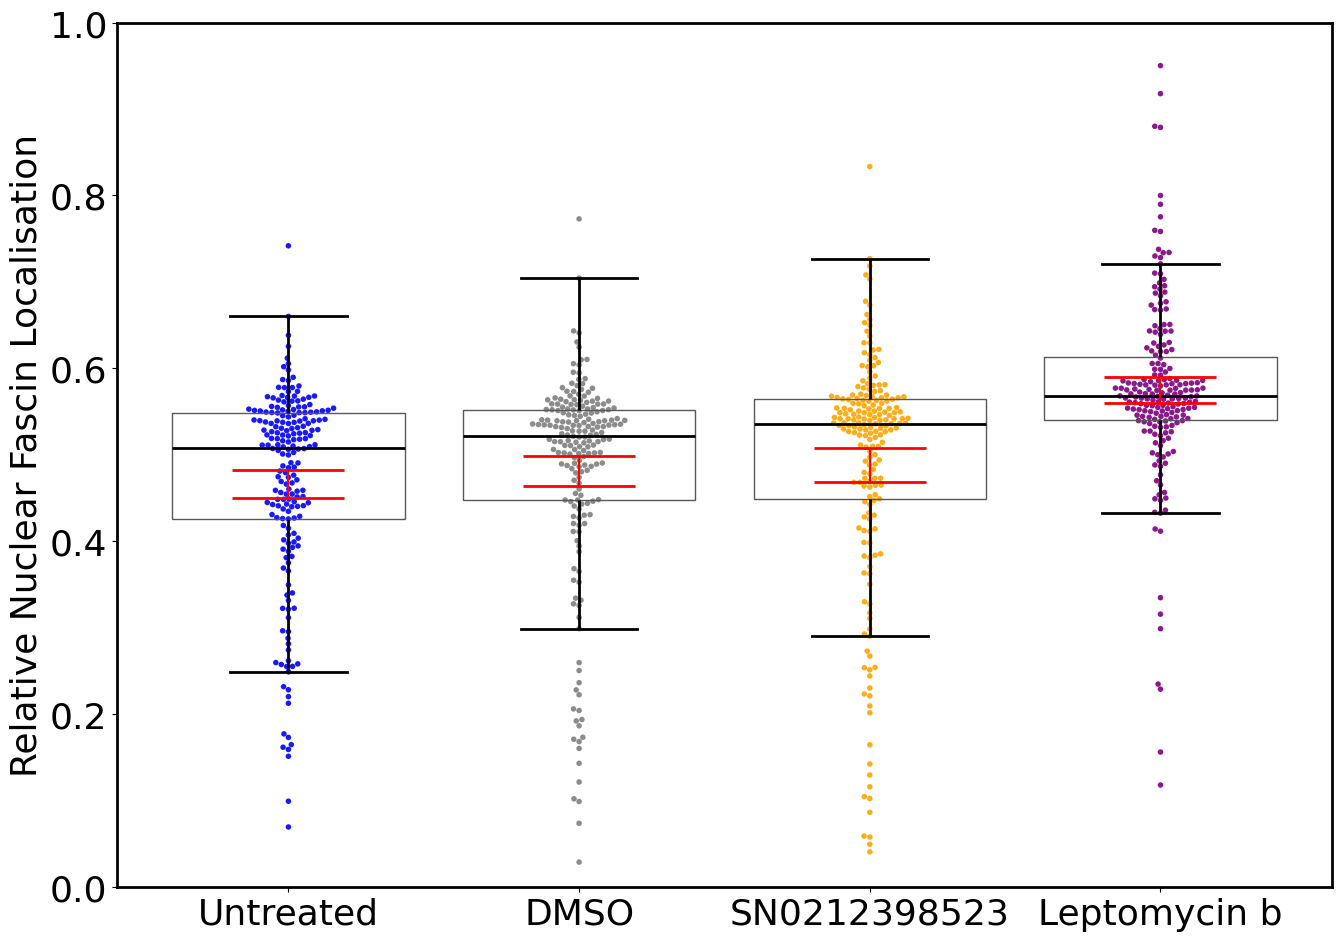

In [9]:
plot_order = ['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b']
point_size = 8
filenames = ['Fig2A.png', 'Fig2B.png', 'Fig2C.png', 'Fig2D.png', 'Fig2E.png', 'Fig2F.png']
filecount = 0
random_seed = 42

for s in [50, 200]:
    if s > 50:
        point_size = 4
    for i in range(3):
        generate_swarmplot(plot_order, data_subset, color_dict, treatment_col, variable_of_interest, 
                           y_label, os.path.join(output_dir, filenames[filecount]),
                           point_size=point_size, random_seed=random_seed, sample_size=s)
        filecount = filecount + 1
        random_seed = random_seed + 1


##### Figure 2G-I

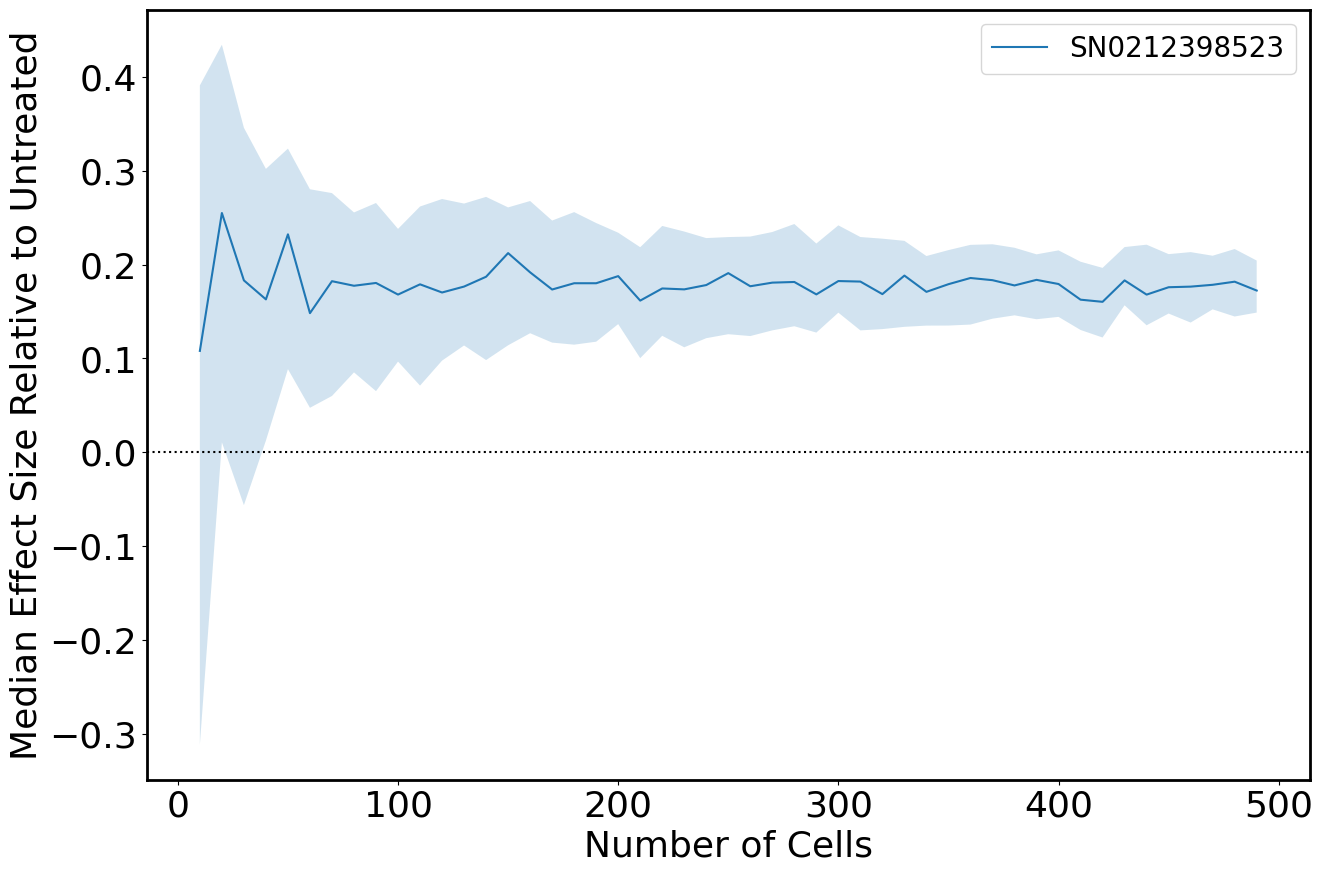

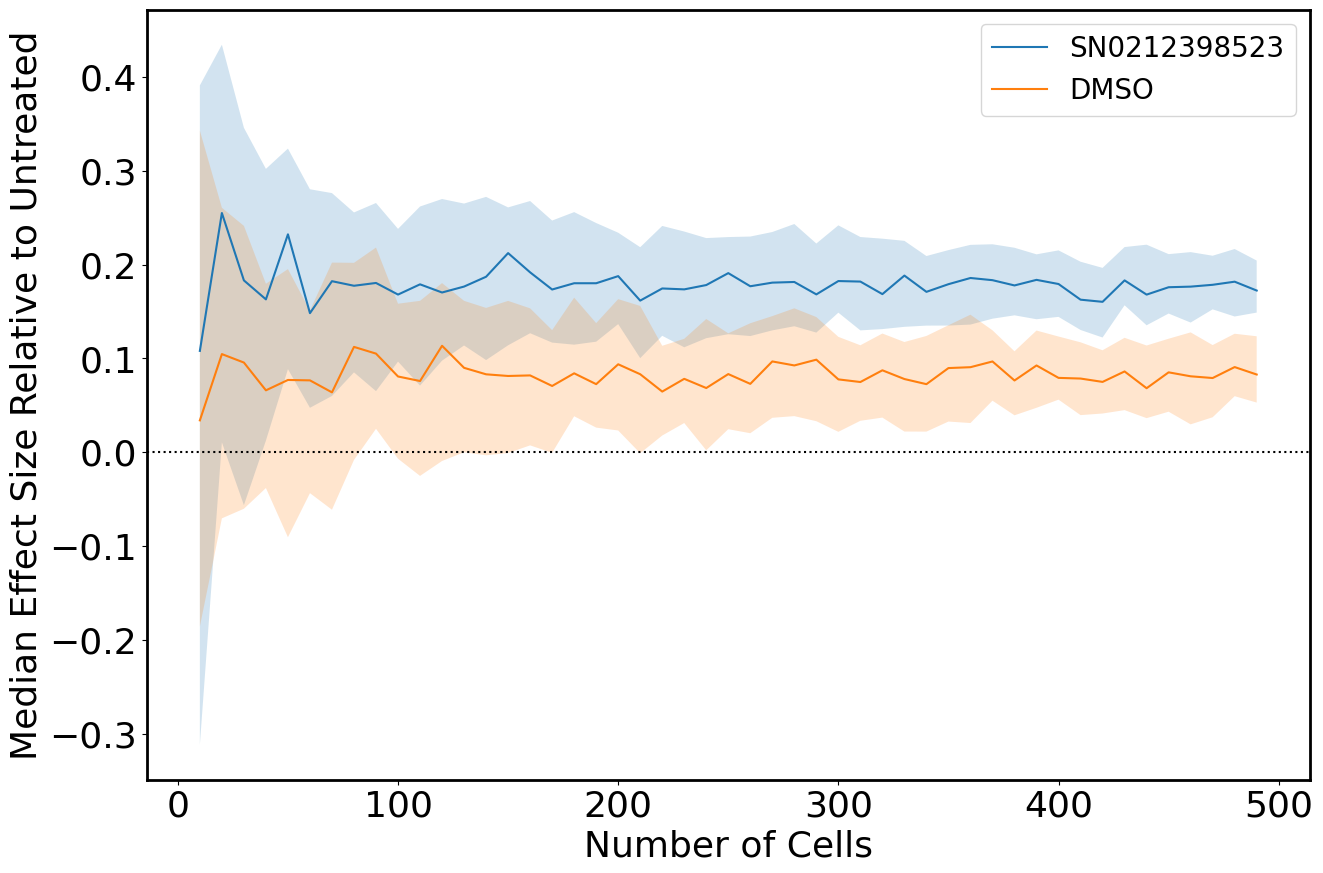

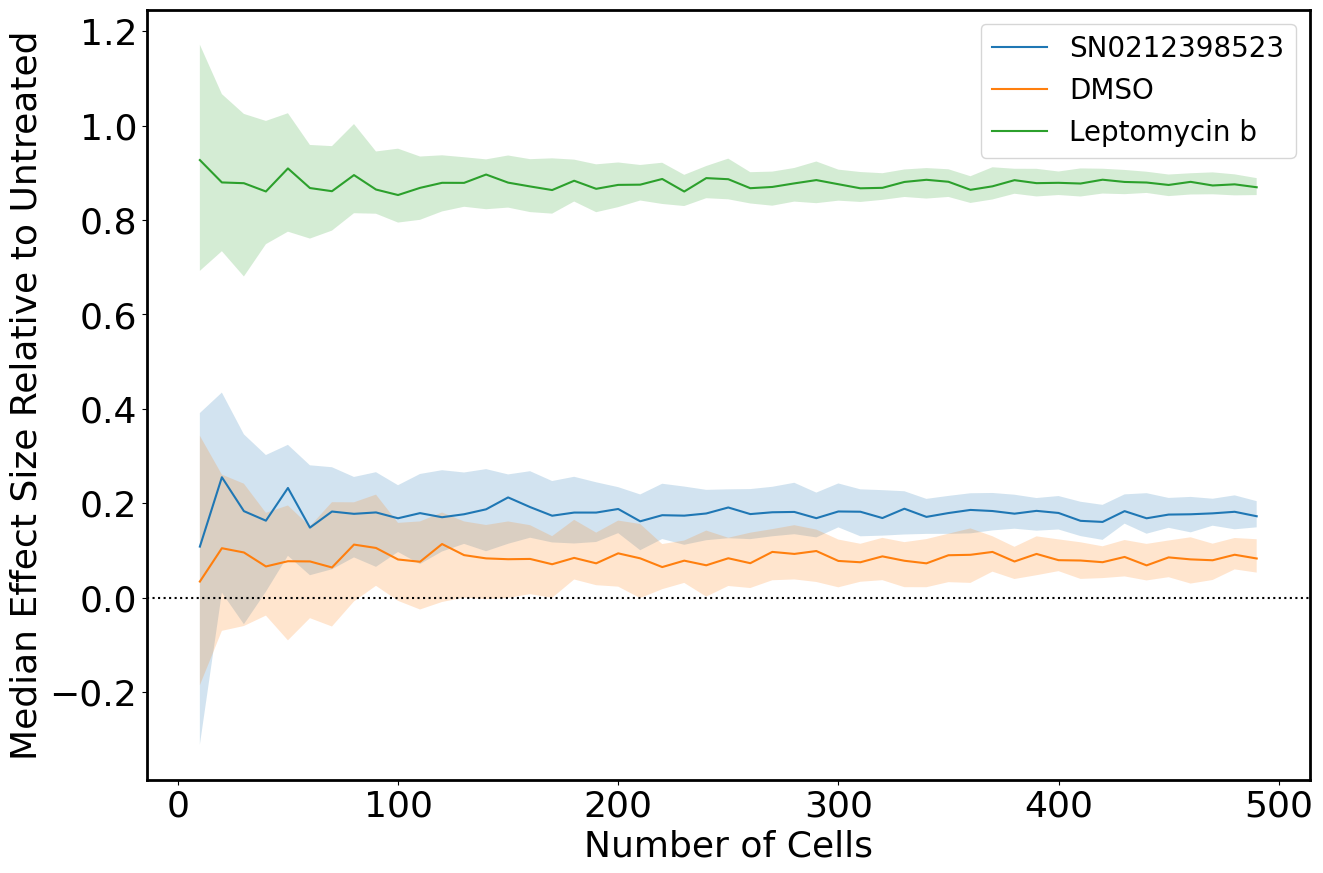

In [10]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100
treatments = ['SN0212398523', 'DMSO', 'Leptomycin b']
filenames = ['Fig2G.png', 'Fig2H.png', 'Fig2I.png']

plot_effect_size_v_sample_size(sample_sizes, num_iterations, data_subset, treatment_col, variable_of_interest, 
                               'Median Effect Size Relative to Untreated', treatments, output_dir, filenames)

##### Figure 3A

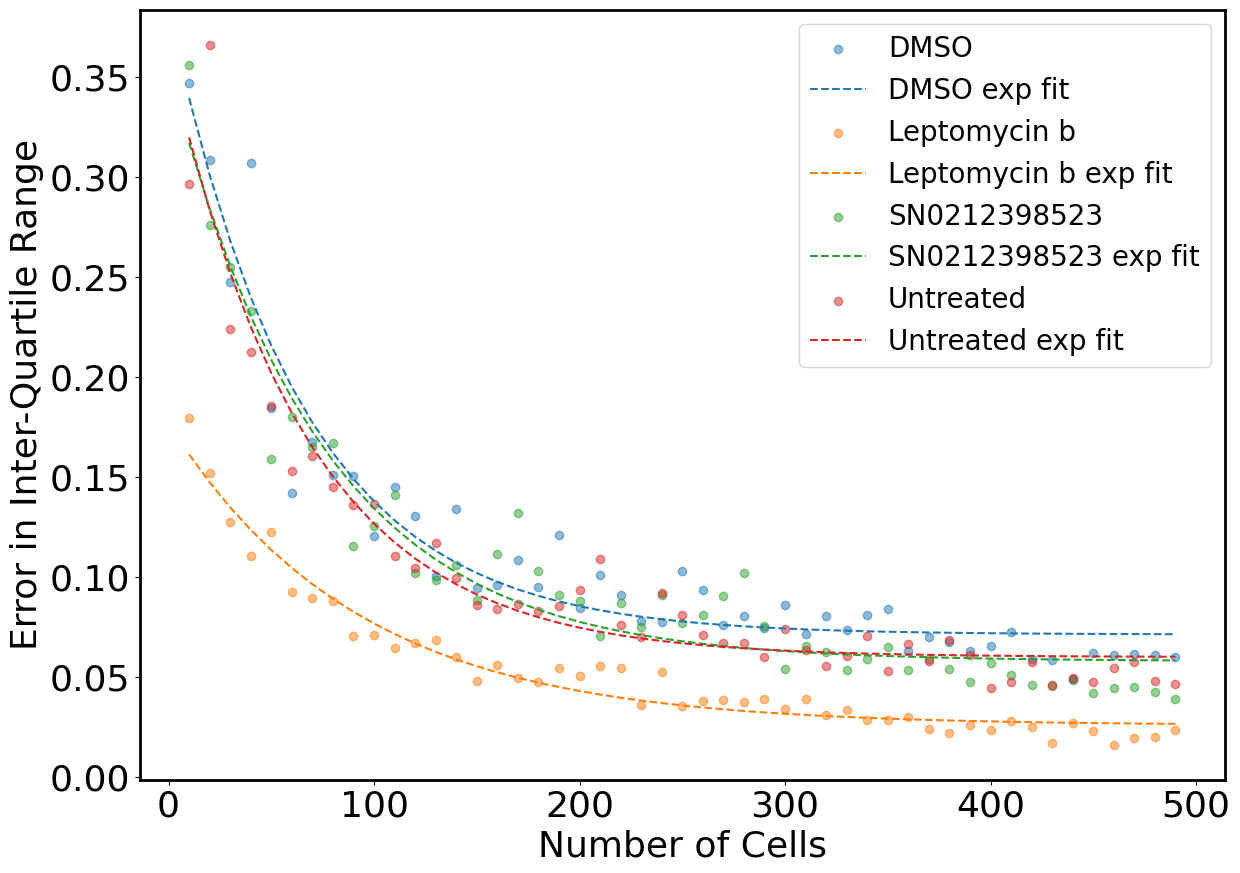

In [11]:
sample_sizes = [*range(10, 500, 10)]
num_iterations = 100

plot_iqr_v_sample_size(sample_sizes, num_iterations, data_subset, treatment_col, variable_of_interest, 
                       'Error in Inter-Quartile Range', os.path.join(output_dir, 'Fig3A.png'))

##### Figure 3B-H

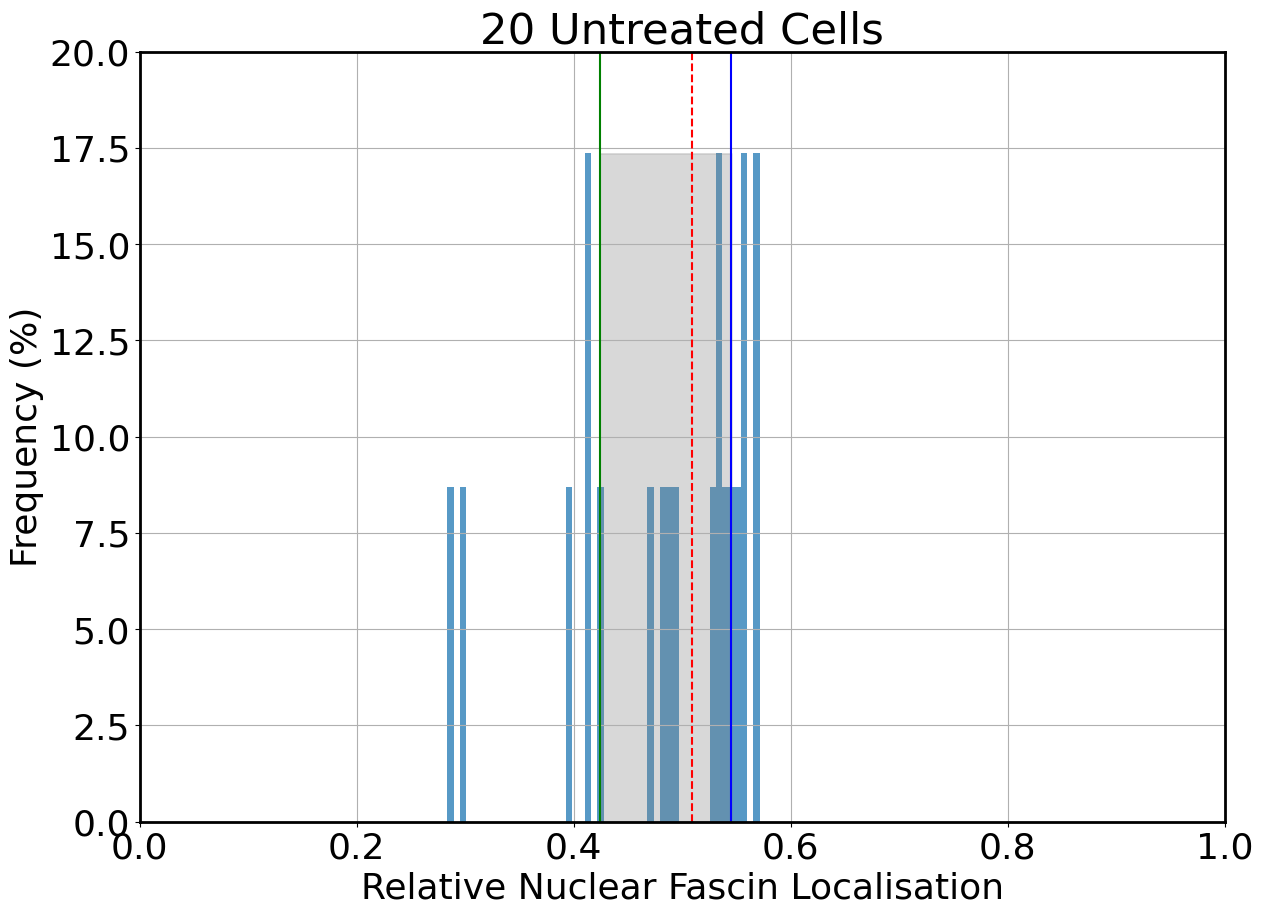

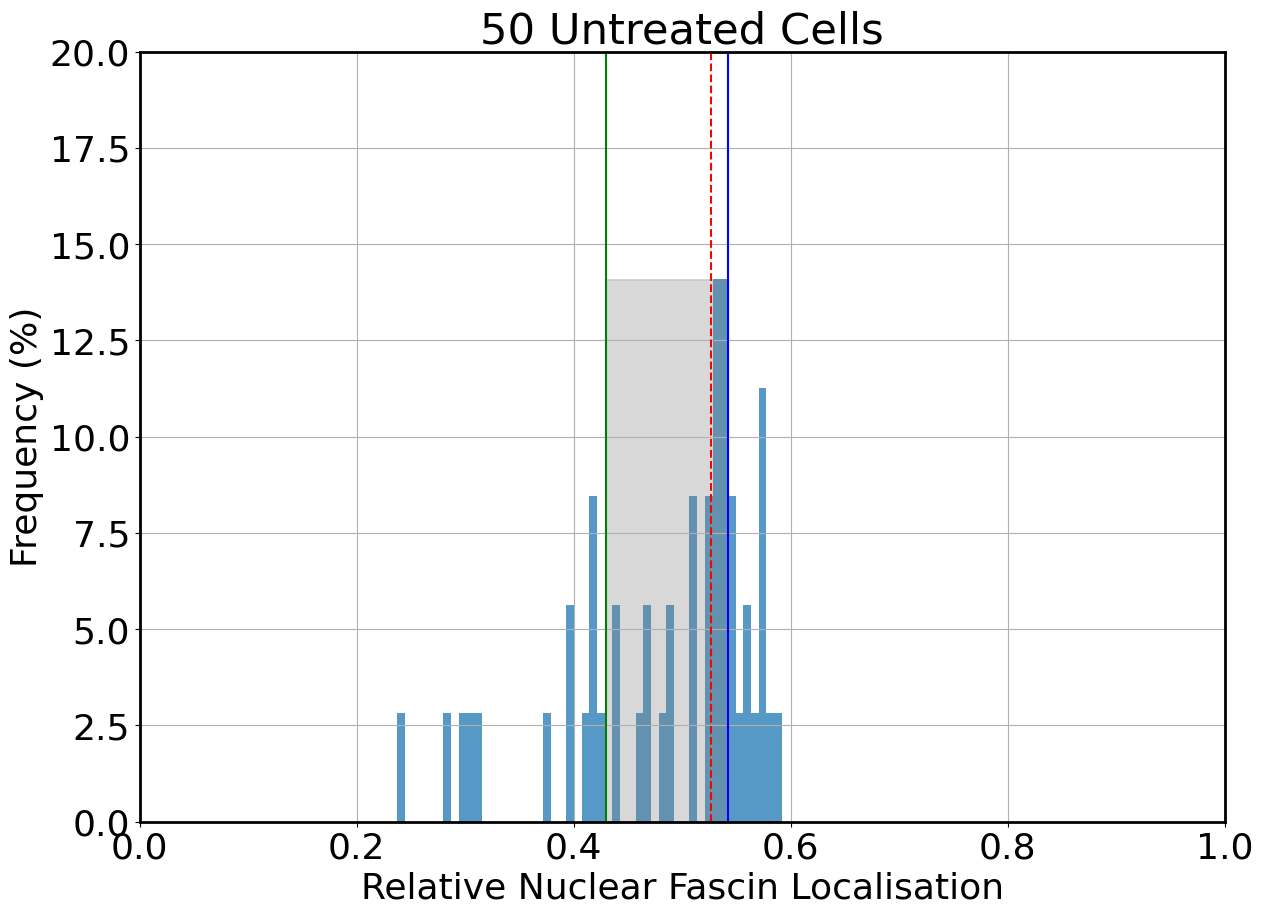

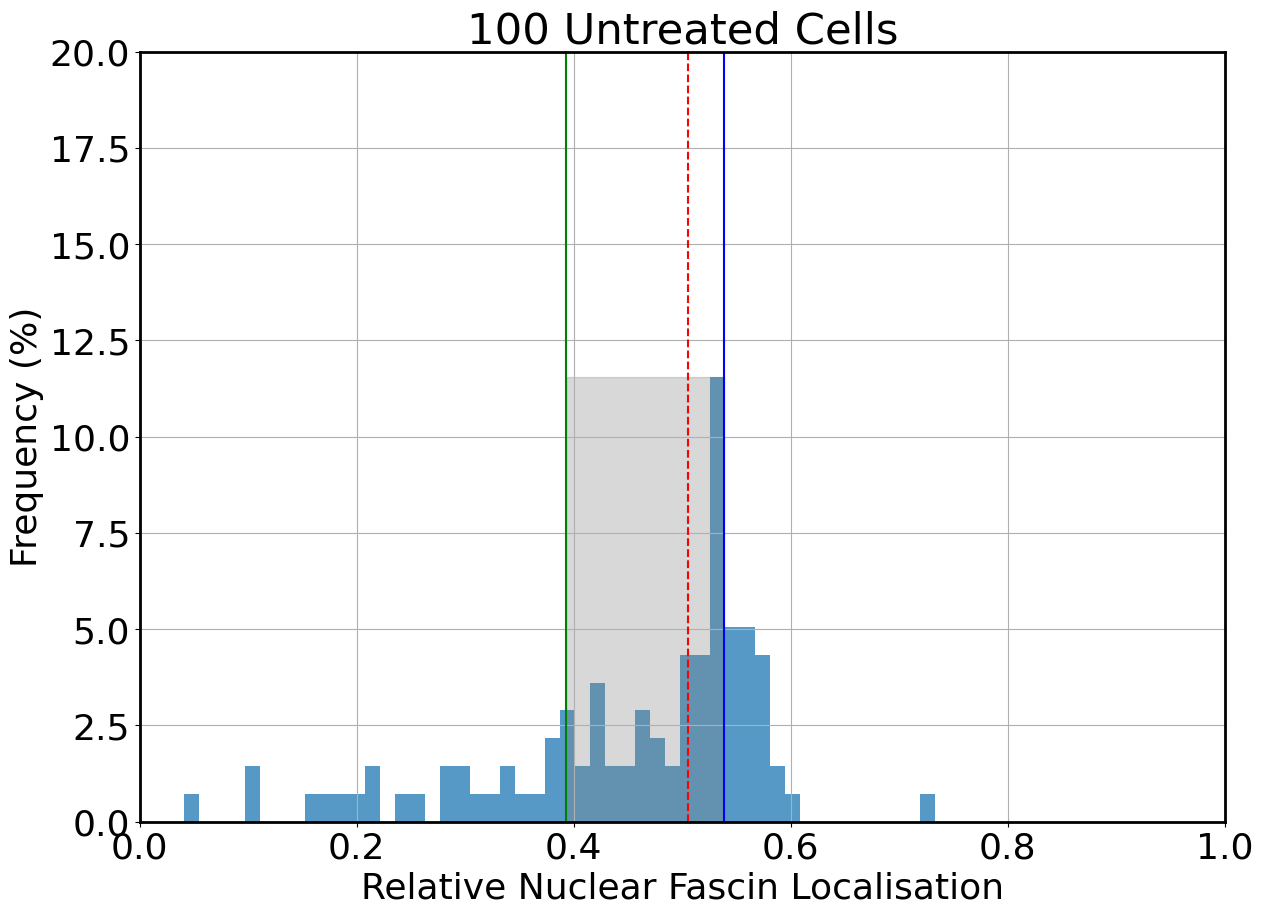

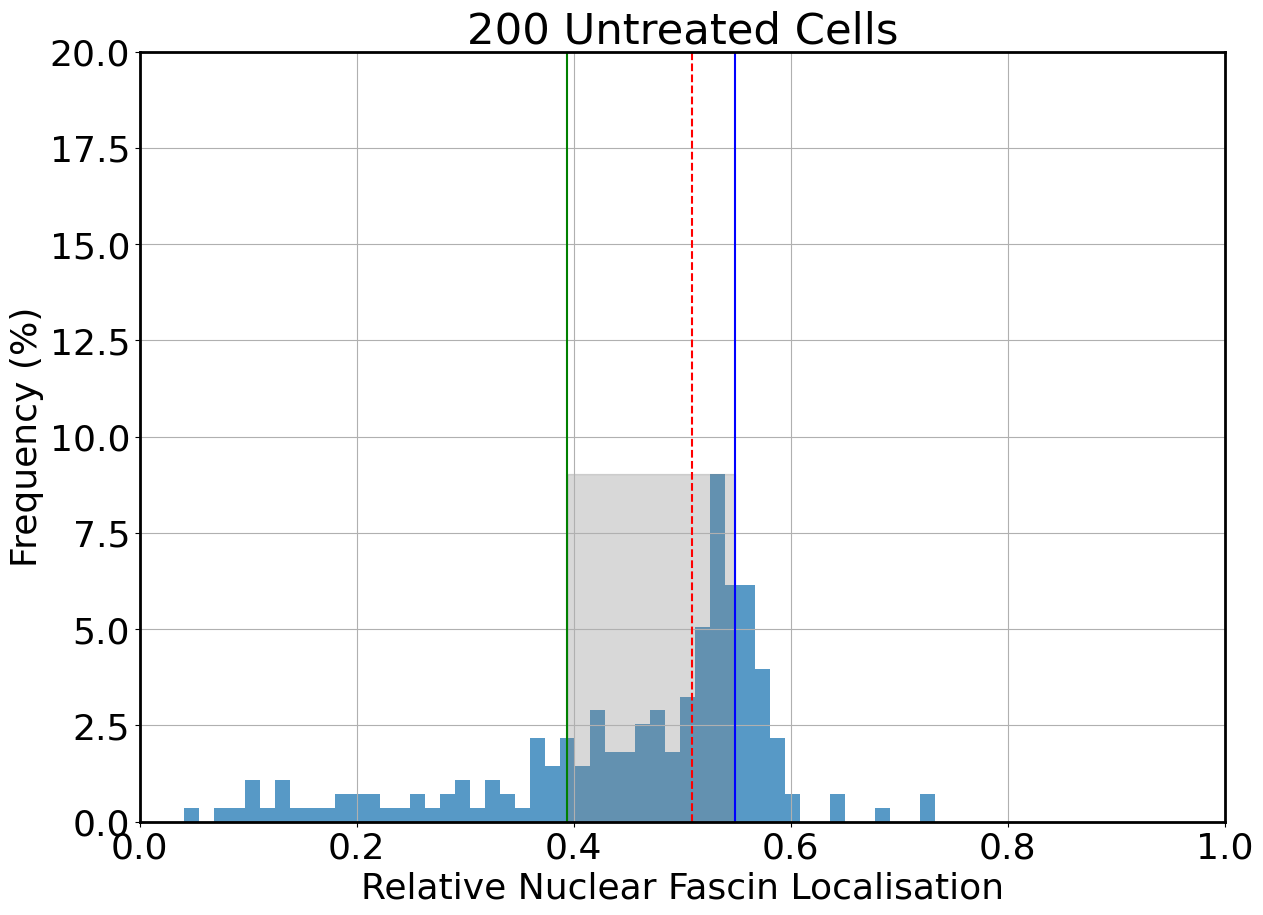

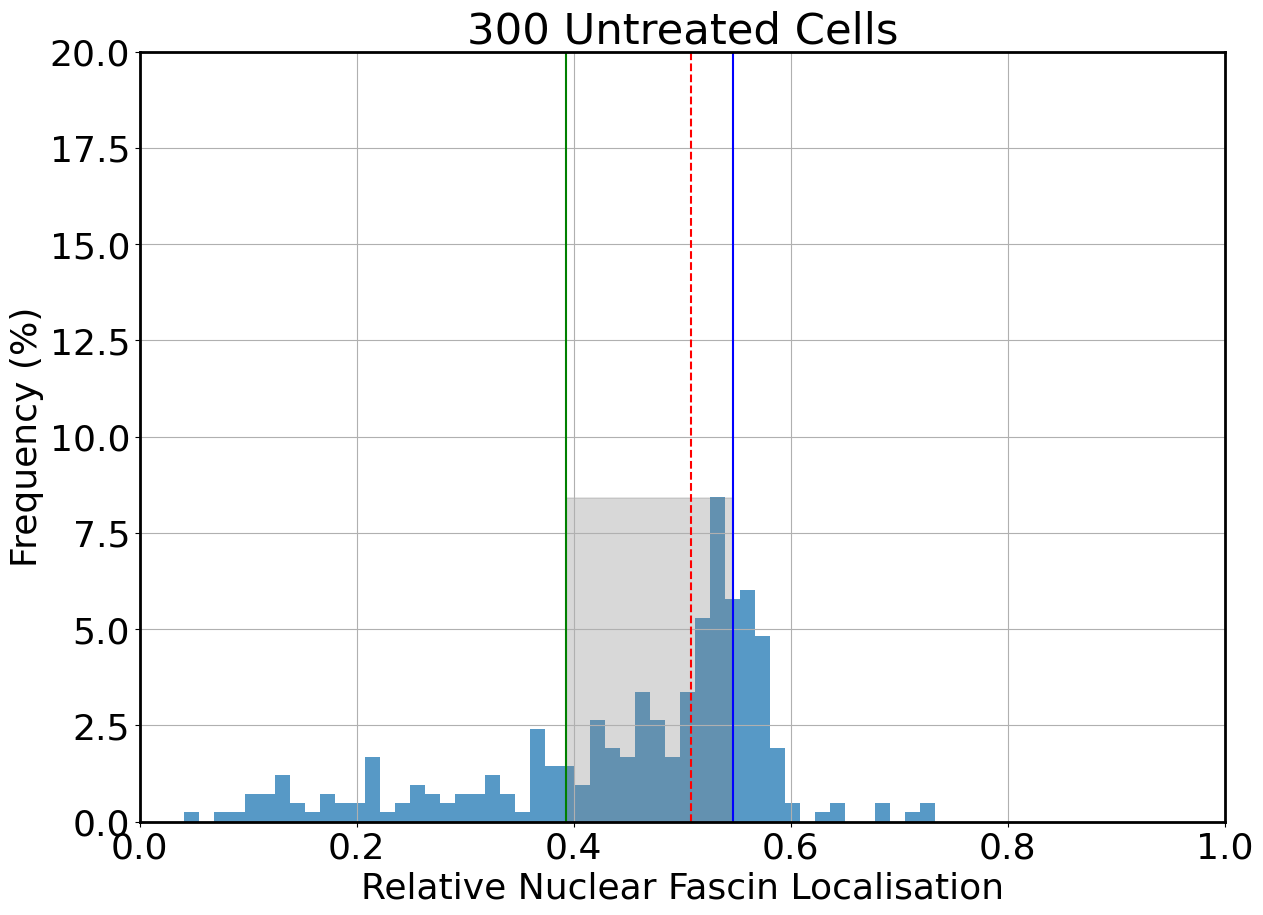

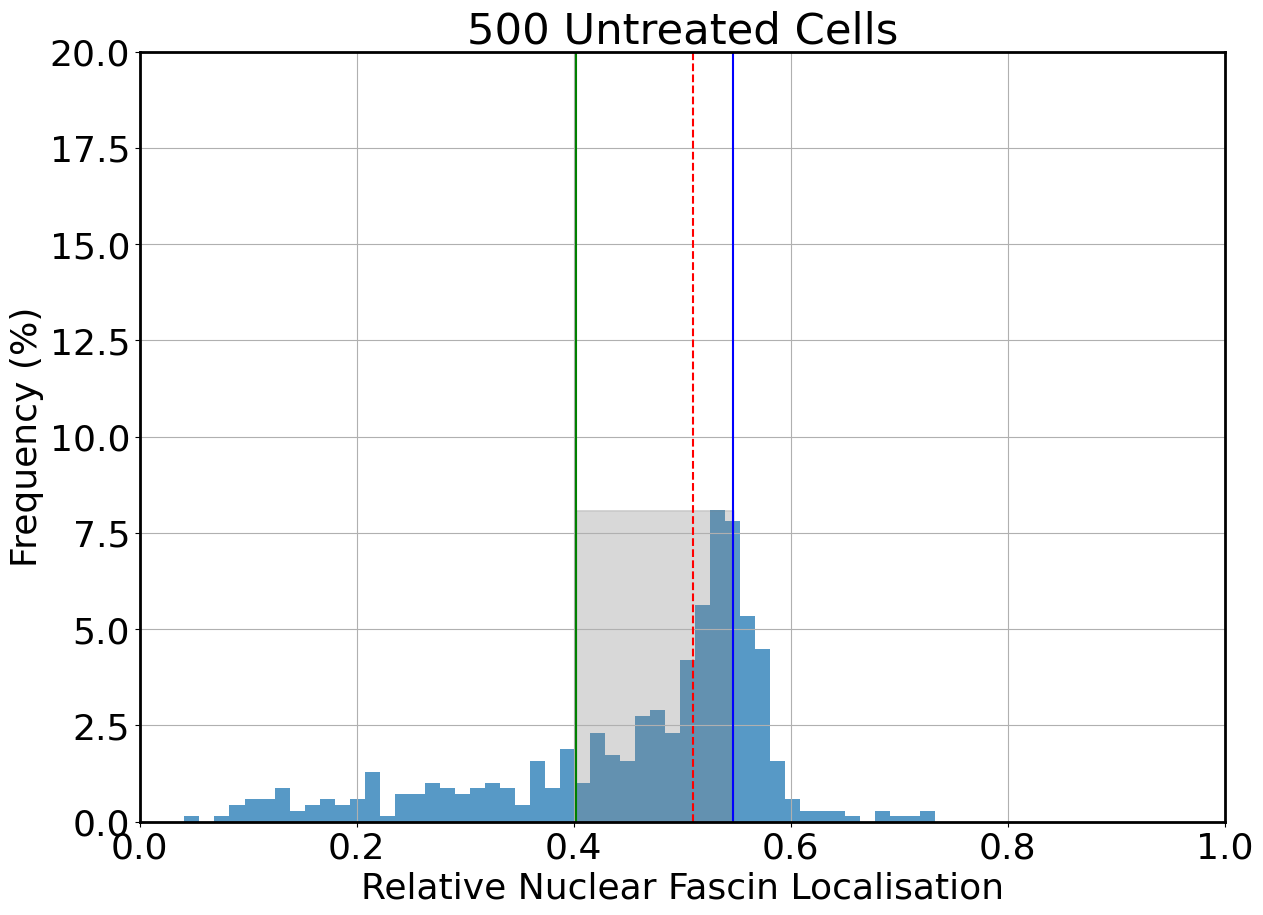

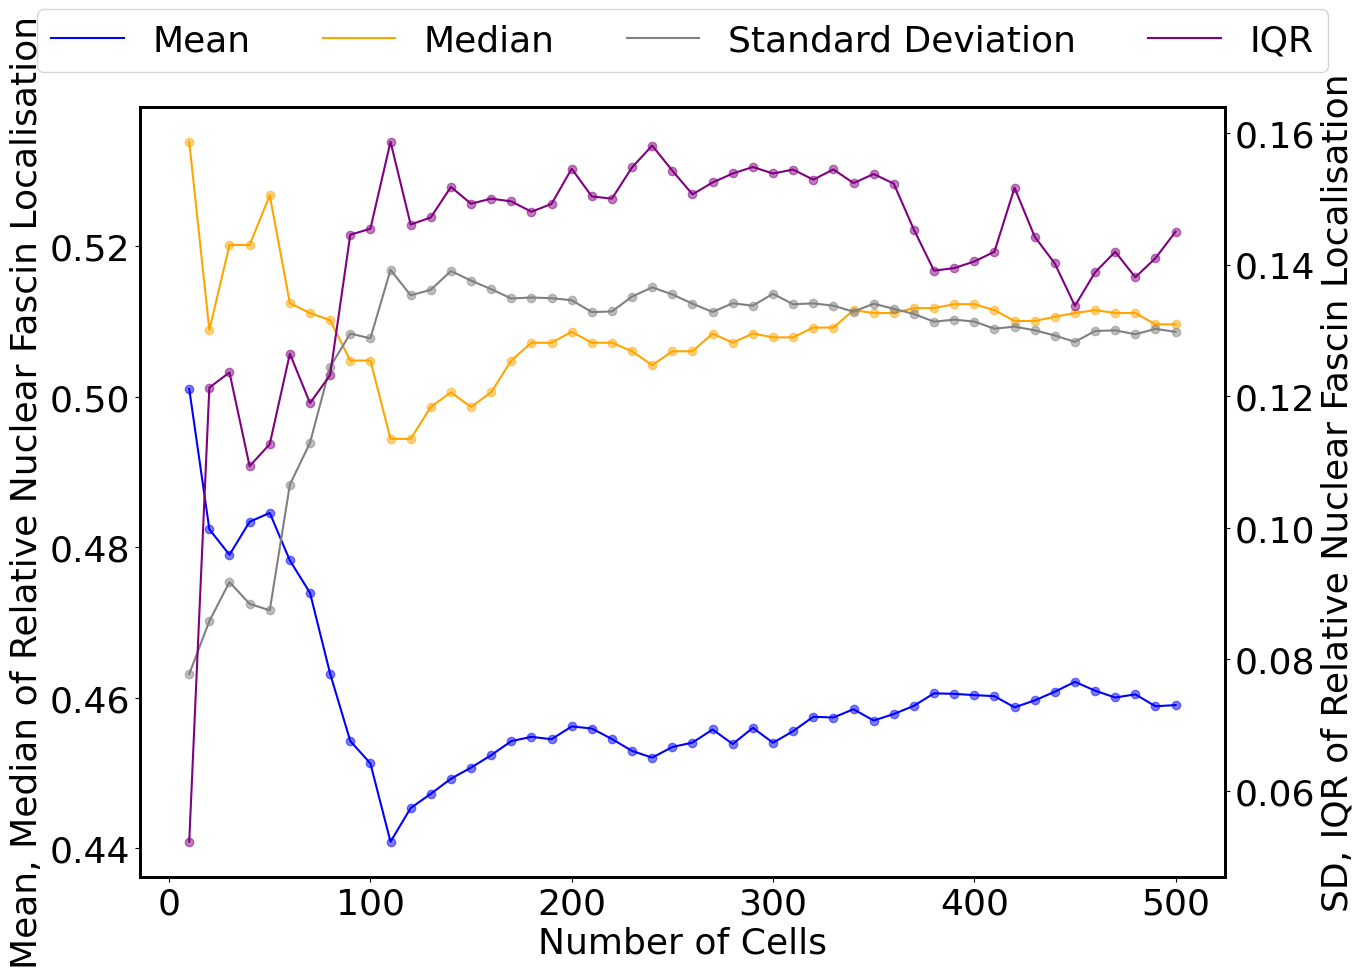

In [12]:
filenames = ['Fig3B.png', 'Fig3C.png', 'Fig3D.png', 'Fig3E.png', 'Fig3F.png', 'Fig3G.png', 'Fig3H.png']
treatment = 'Untreated'

plot_cumulative_histogram_samples(data_subset, variable_of_interest, treatment_col, treatment,
                                  output_dir, filenames,y_label)

##### Figure 4A-C

Treatment: Untreated Well: G15 Mean: 0.510572231603512
Treatment: Untreated Well: I19 Mean: 0.45237818254333545
Treatment: Untreated Well: J05 Mean: 0.4670562284076577
Treatment: DMSO Well: B02 Mean: 0.45242783186540136
Treatment: DMSO Well: N12 Mean: 0.4480517065270713
Treatment: DMSO Well: O02 Mean: 0.47951518654834685
Treatment: SN0212398523 Well: E22 Mean: 0.47541889150580646
Treatment: SN1054616339 Well: H10 Mean: 0.4811240865009145
Treatment: SN1066932540 Well: B06 Mean: 0.4534556500840581
Treatment: Leptomycin b Well: H13 Mean: 0.5714908944808995
Treatment: Leptomycin b Well: L08 Mean: 0.5914879924709187
Treatment: Leptomycin b Well: L18 Mean: 0.564828867013138


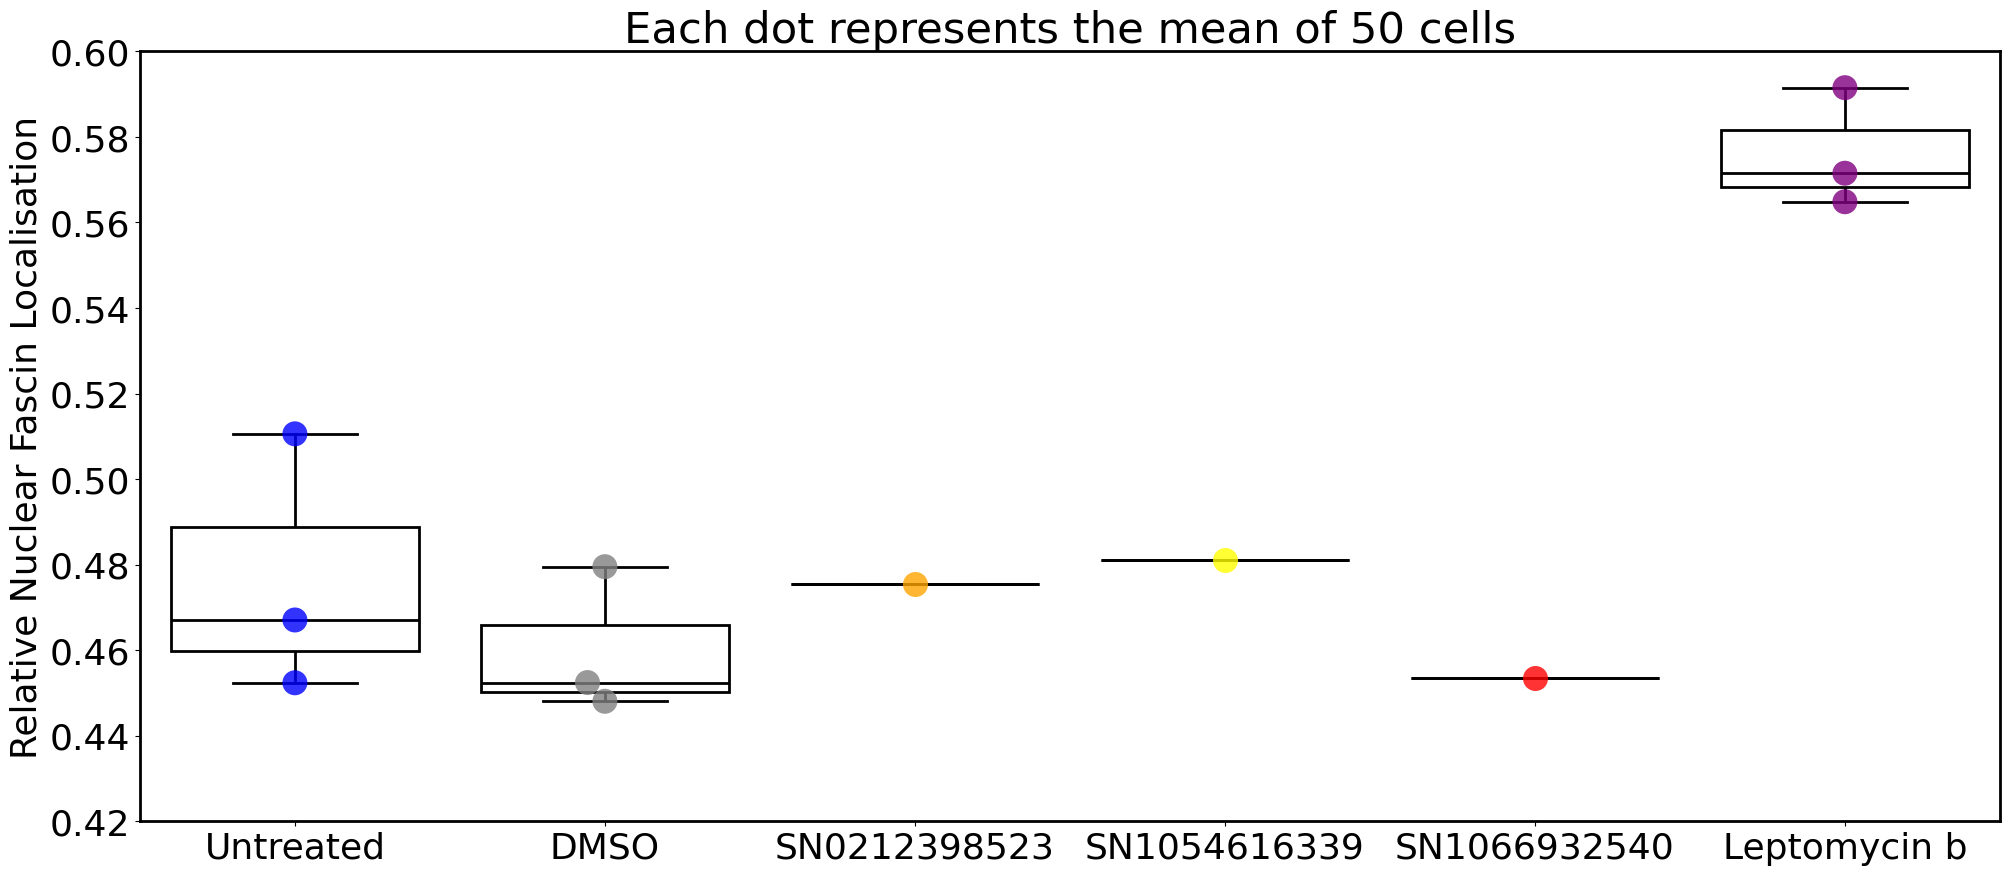

Treatment: Untreated Well: G15 Mean: 0.49311900786750784
Treatment: Untreated Well: I19 Mean: 0.4780515912467172
Treatment: Untreated Well: J05 Mean: 0.47865656907027426
Treatment: DMSO Well: B02 Mean: 0.4485656381755739
Treatment: DMSO Well: N12 Mean: 0.46413396535179463
Treatment: DMSO Well: O02 Mean: 0.4780592529526392
Treatment: SN0212398523 Well: E22 Mean: 0.47734196337499746
Treatment: SN1054616339 Well: H10 Mean: 0.4871113256209125
Treatment: SN1066932540 Well: B06 Mean: 0.4549758948762234
Treatment: Leptomycin b Well: H13 Mean: 0.56007924257286
Treatment: Leptomycin b Well: L08 Mean: 0.5793650179443841
Treatment: Leptomycin b Well: L18 Mean: 0.5507272554137629


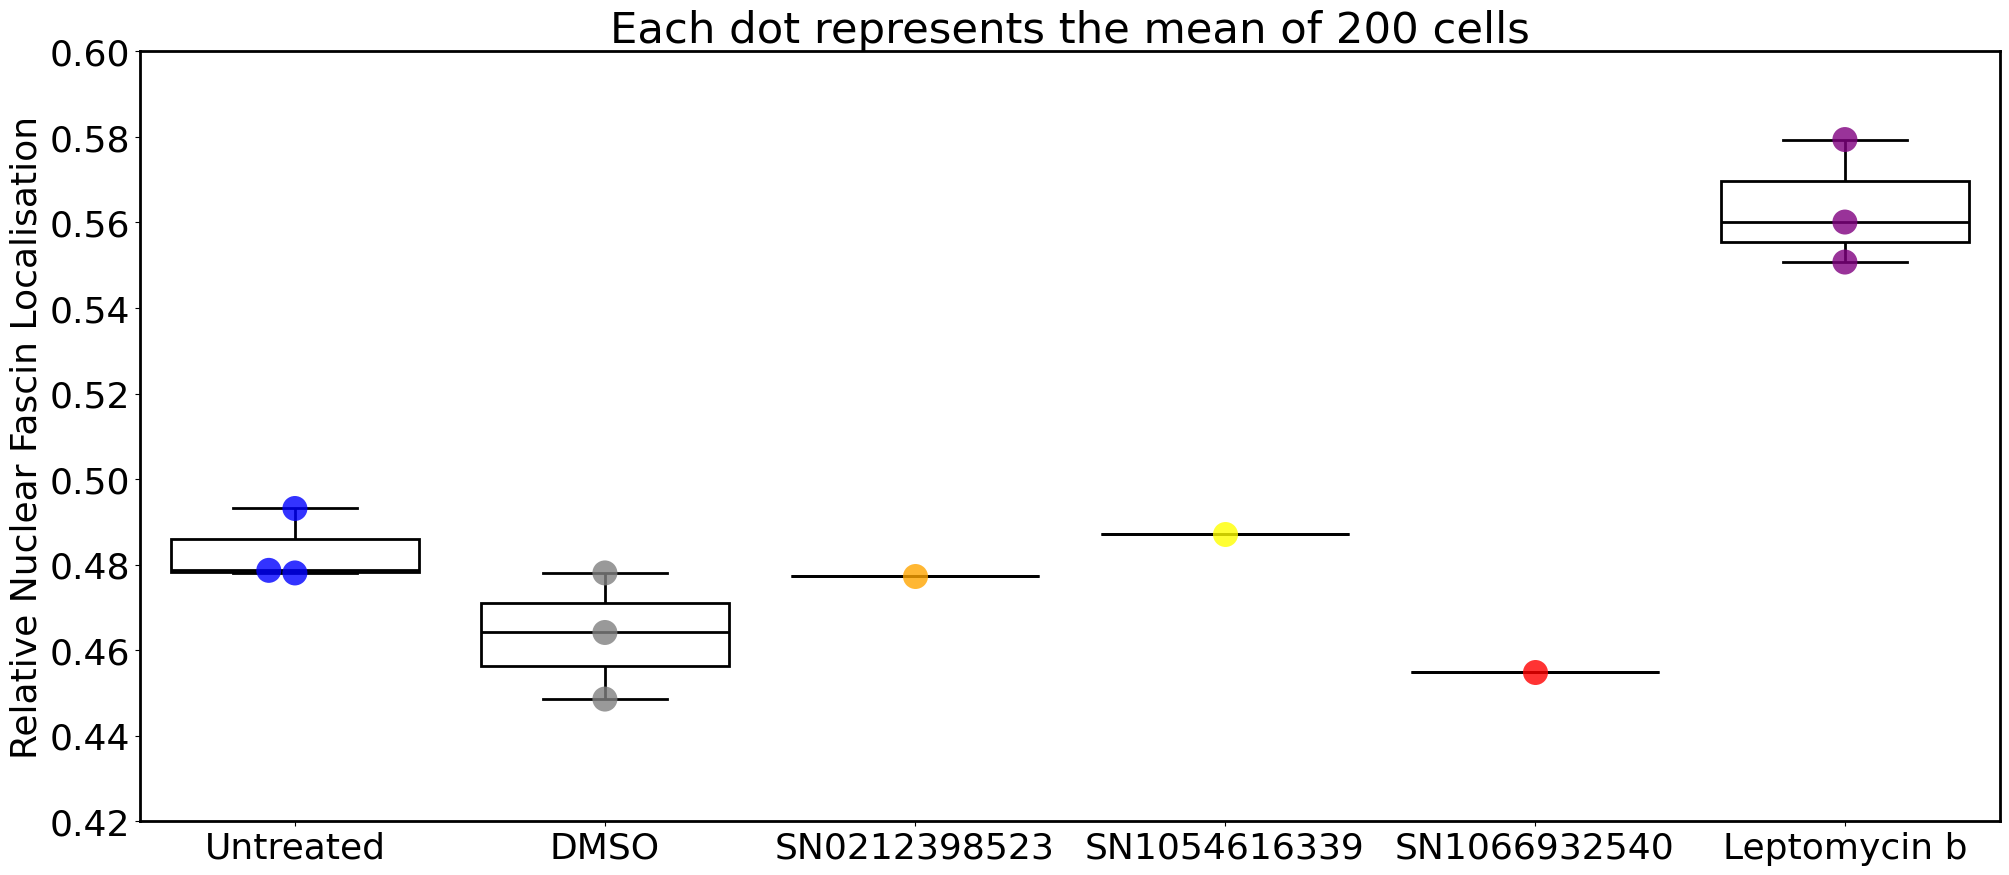

Treatment: Untreated Well: G15 Mean: 0.4980694502589261
Treatment: Untreated Well: I19 Mean: 0.4758960631919693
Treatment: Untreated Well: J05 Mean: 0.46580143547755937
Treatment: DMSO Well: B02 Mean: 0.4605696181304151
Treatment: DMSO Well: N12 Mean: 0.48139368162498614
Treatment: DMSO Well: O02 Mean: 0.4736263062331616
Treatment: SN0212398523 Well: E22 Mean: 0.4932291463110023
Treatment: SN1054616339 Well: H10 Mean: 0.4825304478710361
Treatment: SN1066932540 Well: B06 Mean: 0.4440053728600843
Treatment: Leptomycin b Well: H13 Mean: 0.5531286044042679
Treatment: Leptomycin b Well: L08 Mean: 0.5793381759627215
Treatment: Leptomycin b Well: L18 Mean: 0.5432529455847274


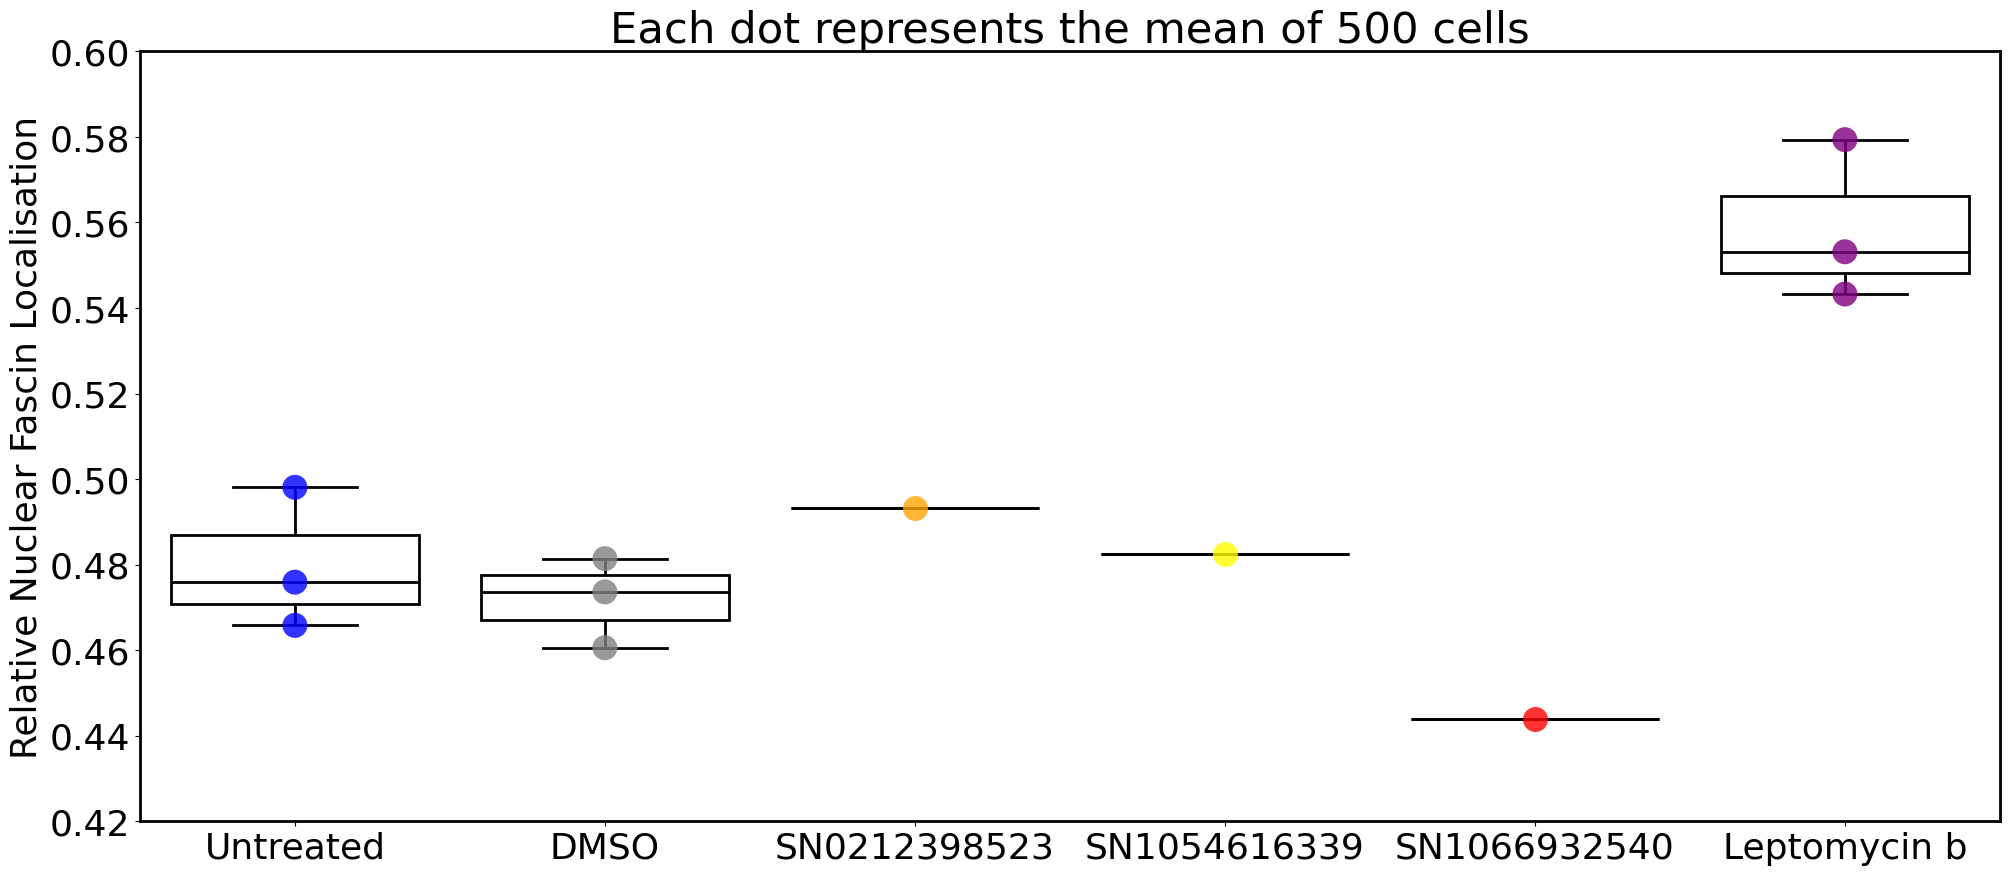

In [13]:
filenames = ['Fig4A.png', 'Fig4B.png', 'Fig4C.png']
filecount = 0
selected_treatments = ['Untreated', 'DMSO', 'SN0212398523', 'SN1054616339', 'SN1066932540', 'Leptomycin b']

for s in [50, 200, 500]:
    generate_swarmplot_of_well_means(selected_treatments, selected_treatments, data_subset1, 
                                     color_dict, treatment_col, variable_of_interest,
                                     y_label, os.path.join(output_dir, filenames[filecount]), sample_size=s)
    filecount = filecount + 1

##### Supplementary Figure 1

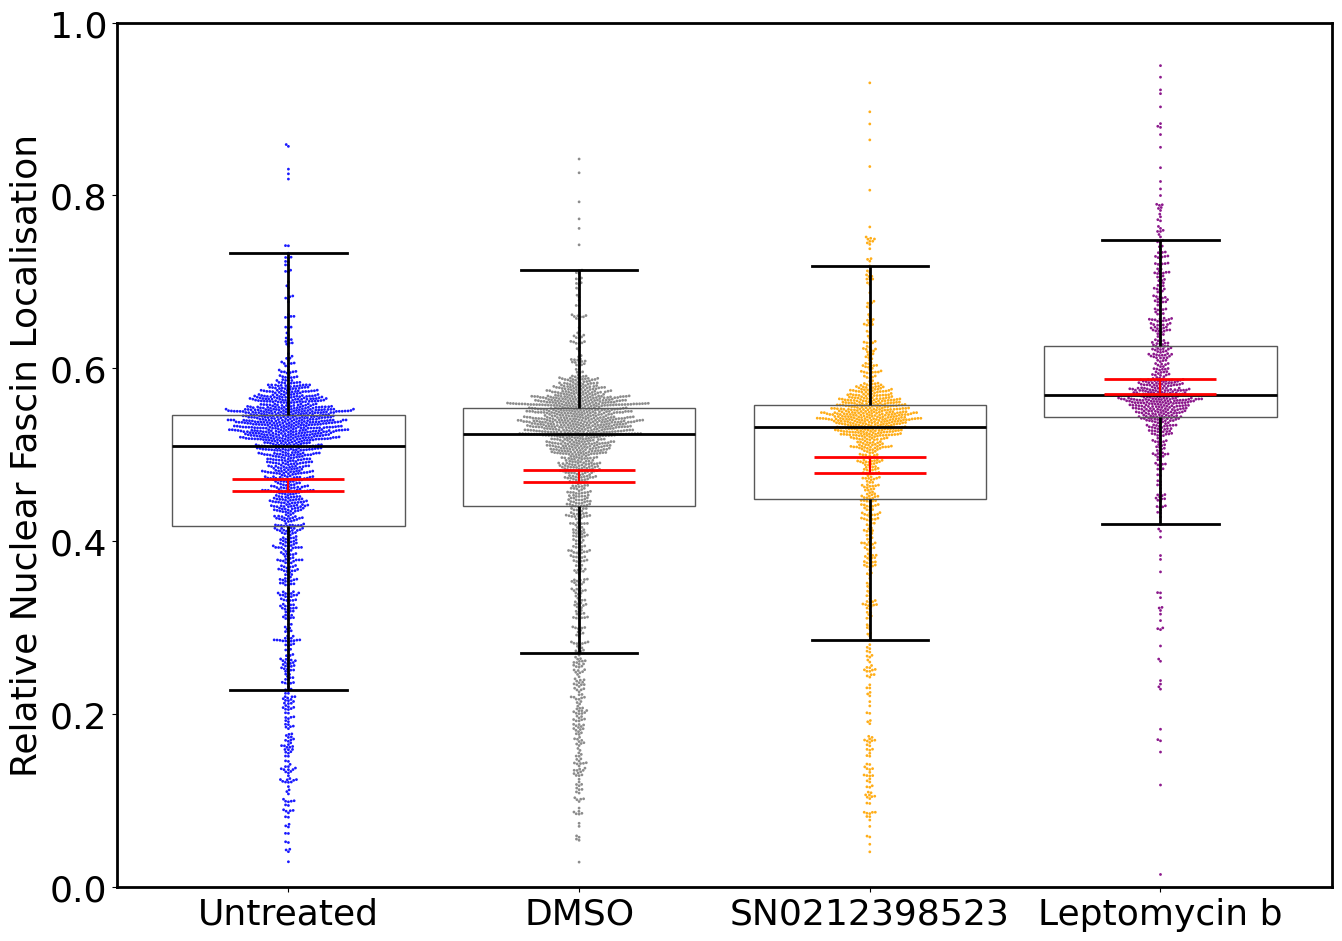

In [14]:
treatments = ['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b']
generate_swarmplot(treatments, data_subset, color_dict, treatment_col,
                   variable_of_interest, y_label, os.path.join(output_dir, 'SupplFig1.png'))
